In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import seaborn as sns

# Data 

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
data.shape

(45211, 11)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

#### y encoded

In [6]:
data.y = data.y.map({'yes':1,'no':0})

### All datatypes are checked

In [7]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

#### Duplicates deleted

In [8]:
data.shape

(45211, 11)

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(45205, 11)

#### Checking for nan values

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [12]:
dd=data

### Data Cleaning

### No need to check for nan and remove duplicates, already did 

# 1)age

In [13]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [14]:
data.age.dtype

dtype('int64')

In [15]:
data.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

### No need to clip the outliers

In [16]:
#iqr = data['age'].quantile(0.75) - data['age'].quantile(0.25)
#upper_threshold = data['age'].quantile(0.75) + (1.5 * iqr)
#lower_threshold = data['age'].quantile(0.25) - (1.5 * iqr)
#print('UT  -',round(upper_threshold,3),'LT  -', round(lower_threshold,3))
#print('Max -',round(data['age'].max(),3),'Min -',round(data['age'].min(),3))

In [17]:
#data.age = data.age.clip(min(data.age), upper_threshold)
#data.age.describe()

## EDA

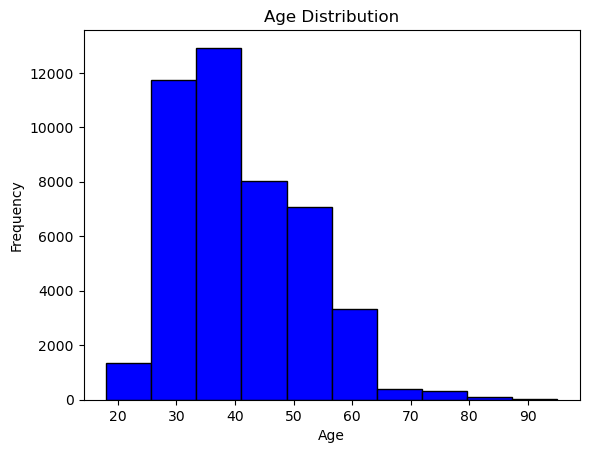

In [18]:
# Plot histogram
plt.hist(dd['age'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()

In [19]:
#fig = plt.figure(figsize=(15, 8))
#age_conversion_rates = dd.groupby('age')['y'].mean()
#sorted_age =  age_conversion_rates.reset_index().sort_values('age')['age']
#plt.xticks(rotation=90) 
#sns.barplot(x='age', y='y', data=dd, order=sorted_age )

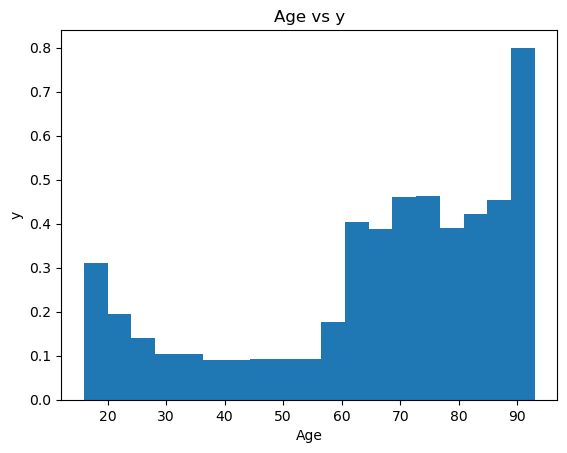

In [20]:
bins = np.linspace(dd.age.min(),dd.age.max(), 20)
c=np.digitize(dd.age,bins)
plt.bar(bins[:-1], [np.mean(dd.y.values[c == i]) for i in range(1, len(bins))], width= bins[1] - bins[0])
# Add labels and title
plt.xlabel('Age')
plt.ylabel('y')
plt.title('Age vs y')
plt.show()

# 2)job

In [21]:
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [22]:
job = list(data.job.unique())

## EDA

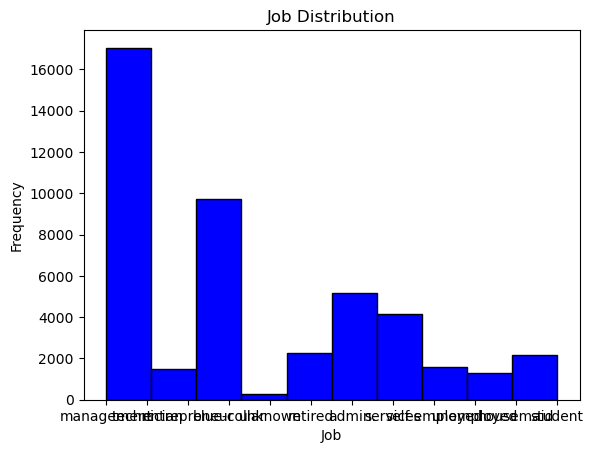

In [23]:
# Plot histogram
plt.hist(dd['job'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Job Distribution')

# Show the plot
plt.show()

Text(0.5, 1.0, 'job vs y')

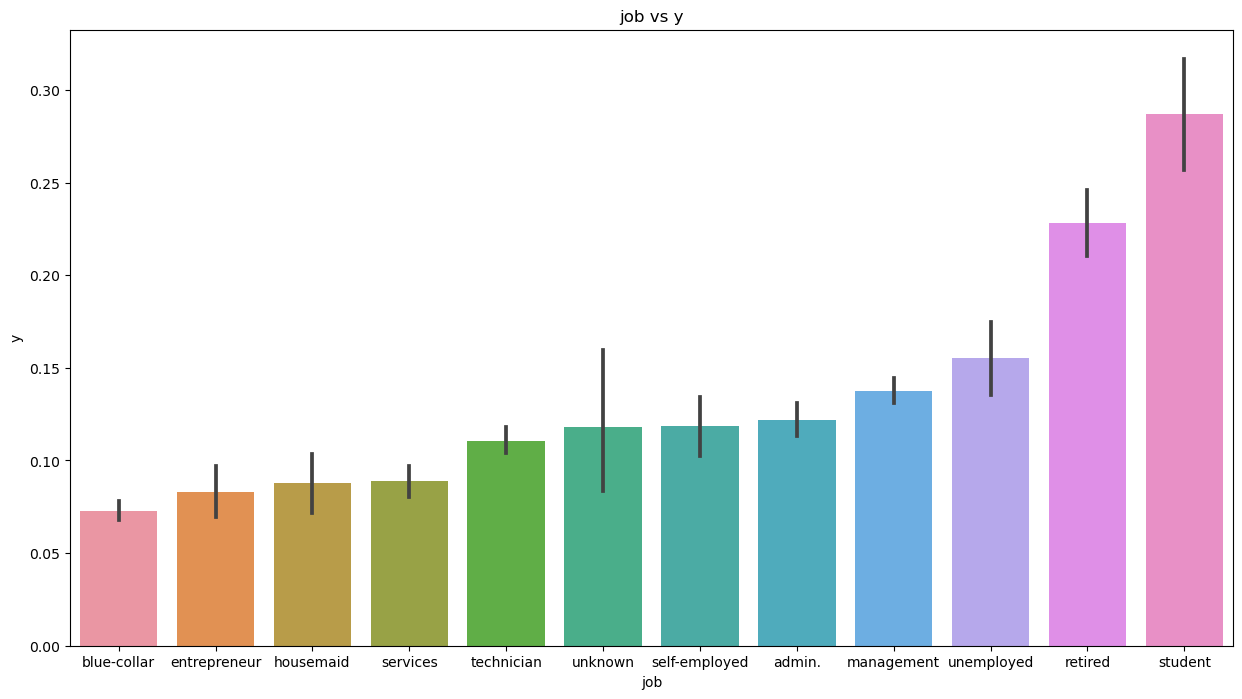

In [24]:
fig = plt.figure(figsize=(15, 8))
job_conversion_rates = dd.groupby('job')['y'].mean()
sorted_job =  job_conversion_rates.reset_index().sort_values('y')['job']
#plt.xticks(rotation=90) 
sns.barplot(x='job', y='y', data=dd, order=sorted_job )
plt.xlabel('job')
plt.ylabel('y')
plt.title('job vs y')

In [25]:
print('% of unknown job',round(len(data.loc[data.job=='unknown'])*100/len(data),2))

% of unknown job 0.64


### Since % is very less, lets impute the job with the mode 

In [26]:
maxjob={}
for i in job:
    maxjob.update({i : (len(data.loc[(data.job==i)]) / len(data.job))*100}) 

In [27]:
max(maxjob.values())

21.524167680566308

In [28]:
maxjob

{'management': 20.920252184492867,
 'technician': 16.803450945691846,
 'entrepreneur': 3.2894591306271432,
 'blue-collar': 21.524167680566308,
 'unknown': 0.6370976661873686,
 'retired': 5.008295542528481,
 'admin.': 11.436787965932972,
 'services': 9.187036832208827,
 'self-employed': 3.4929764406592194,
 'unemployed': 2.882424510562991,
 'housemaid': 2.743059396084504,
 'student': 2.0749917044574717}

### Impute unknown as blue-collar

In [29]:
data.job = data.job.str.replace("unknown","blue-collar")

In [30]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [31]:
maxjob={}
for i in job:
    maxjob.update({i : (len(data.loc[(data.job==i)]) / len(data.job))*100}) 

In [32]:
maxjob

{'management': 20.920252184492867,
 'technician': 16.803450945691846,
 'entrepreneur': 3.2894591306271432,
 'blue-collar': 22.161265346753677,
 'unknown': 0.0,
 'retired': 5.008295542528481,
 'admin.': 11.436787965932972,
 'services': 9.187036832208827,
 'self-employed': 3.4929764406592194,
 'unemployed': 2.882424510562991,
 'housemaid': 2.743059396084504,
 'student': 2.0749917044574717}

In [33]:
job = list(data.job.unique())

In [34]:
job

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'retired',
 'admin.',
 'services',
 'self-employed',
 'unemployed',
 'housemaid',
 'student']

#### Label Encoding

In [35]:
job_suc={}
for i in job:
    job_suc.update({i : (len(data.loc[(data.job==i) & (data.y==1)]) / len(data.loc[(data.job==i)]))*100}) 

In [36]:
job_suc

{'management': 13.757005392830706,
 'technician': 11.058451816745656,
 'entrepreneur': 8.271687962340282,
 'blue-collar': 7.406667997604312,
 'retired': 22.791519434628977,
 'admin.': 12.205029013539653,
 'services': 8.885143269925354,
 'self-employed': 11.842938568714375,
 'unemployed': 15.502686108979278,
 'housemaid': 8.790322580645162,
 'student': 28.678038379530918}

In [37]:
job_suc = pd.Series(job_suc)

In [38]:
job_suc = job_suc.sort_values()

In [39]:
job_suc

blue-collar       7.406668
entrepreneur      8.271688
housemaid         8.790323
services          8.885143
technician       11.058452
self-employed    11.842939
admin.           12.205029
management       13.757005
unemployed       15.502686
retired          22.791519
student          28.678038
dtype: float64

In [40]:
rankjob = {x: i for i, x in enumerate(job_suc.index)}

In [41]:
rankjob

{'blue-collar': 0,
 'entrepreneur': 1,
 'housemaid': 2,
 'services': 3,
 'technician': 4,
 'self-employed': 5,
 'admin.': 6,
 'management': 7,
 'unemployed': 8,
 'retired': 9,
 'student': 10}

In [42]:
data['job'] = data['job'].map(rankjob)

In [43]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,4,single,secondary,unknown,5,may,151,1,unknown,0
2,33,1,married,secondary,unknown,5,may,76,1,unknown,0
3,47,0,married,unknown,unknown,5,may,92,1,unknown,0
4,33,0,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,9,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,9,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,0,married,secondary,telephone,17,nov,508,4,unknown,0


### 3)marital

In [44]:
data.sample(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
36029,57,5,married,primary,cellular,11,may,108,6,failure,0
33247,47,3,single,tertiary,cellular,20,apr,96,1,unknown,0
9456,35,0,married,unknown,unknown,6,jun,159,3,unknown,0
22468,52,7,married,tertiary,cellular,22,aug,232,2,unknown,0
522,52,6,married,secondary,unknown,6,may,128,1,unknown,0


In [45]:
mar = list(data.marital.unique())

In [46]:
mar

['married', 'single', 'divorced']

## EDA

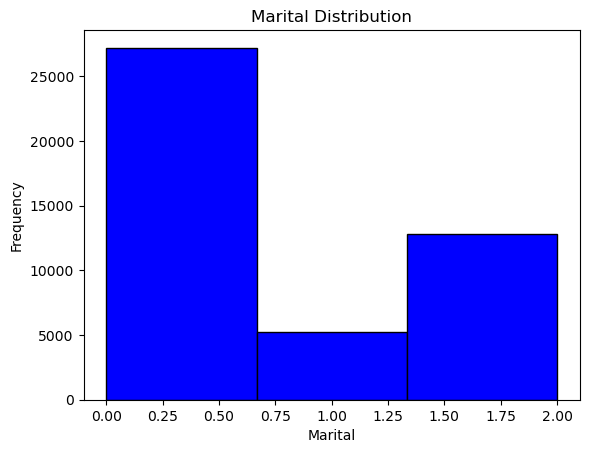

In [276]:
# Plot histogram
plt.hist(dd['marital'], bins=3, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Marital')
plt.ylabel('Frequency')
plt.title('Marital Distribution')

# Show the plot
plt.show()

Text(0.5, 1.0, 'marital vs y')

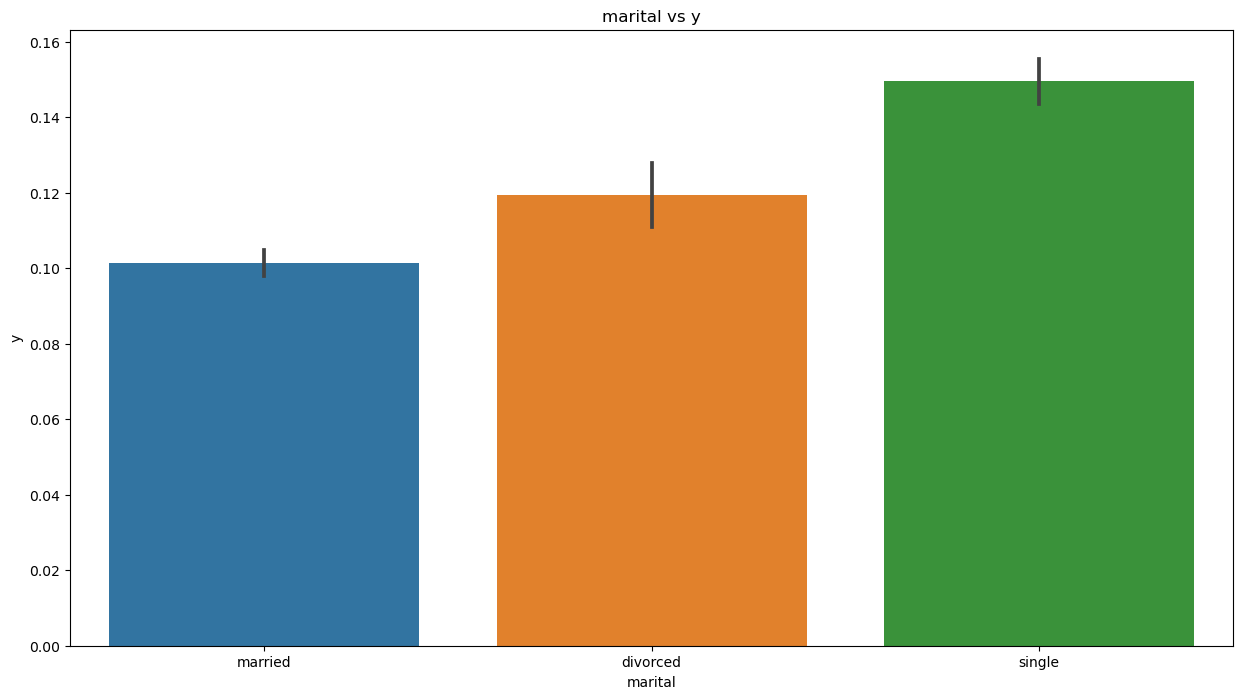

In [48]:
fig = plt.figure(figsize=(15, 8))
marital_conversion_rates = dd.groupby('marital')['y'].mean()
sorted_marital =  marital_conversion_rates.reset_index().sort_values('y')['marital']
#plt.xticks(rotation=90) 
sns.barplot(x='marital', y='y', data=dd, order=sorted_marital )
plt.xlabel('marital')
plt.ylabel('y')
plt.title('marital vs y')

In [49]:
mar_suc={}
for i in mar:
    mar_suc.update({i : (len(data.loc[(data.marital==i) & (data.y==1)]) / len(data.loc[(data.marital==i)]))*100})

In [50]:
mar_suc

{'married': 10.124954061006983,
 'single': 14.95151704723178,
 'divorced': 11.945458037257538}

In [51]:
mar_suc = pd.Series(mar_suc)

In [52]:
mar_suc = mar_suc.sort_values()

In [53]:
mar_suc

married     10.124954
divorced    11.945458
single      14.951517
dtype: float64

In [54]:
rankmar = {x: i for i, x in enumerate(mar_suc.index)}

In [55]:
rankmar

{'married': 0, 'divorced': 1, 'single': 2}

In [56]:
data['marital'] = data['marital'].map(rankmar)

In [57]:
data.sample(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
593,48,9,0,secondary,unknown,6,may,315,1,unknown,0
22857,31,4,0,secondary,cellular,25,aug,348,2,unknown,0
23147,36,4,2,secondary,cellular,26,aug,109,14,unknown,0
27595,45,9,2,secondary,cellular,21,nov,64,5,unknown,0
30278,54,8,1,secondary,cellular,5,feb,2,1,unknown,0


### 4)education_qual

In [58]:
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,tertiary,unknown,5,may,261,1,unknown,0
1,44,4,2,secondary,unknown,5,may,151,1,unknown,0
2,33,1,0,secondary,unknown,5,may,76,1,unknown,0
3,47,0,0,unknown,unknown,5,may,92,1,unknown,0
4,33,0,2,unknown,unknown,5,may,198,1,unknown,0


In [59]:
edu = list(data.education_qual.unique())

In [60]:
edu

['tertiary', 'secondary', 'unknown', 'primary']

In [61]:
print('% of unknown education qualification',round(len(data.loc[data.education_qual=='unknown'])*100/len(data),2))

% of unknown education qualification 4.11


### Since % is very less, lets impute the edu_qual with the mode

In [62]:
maxedu={}
for i in edu:
    maxedu.update({i : (len(data.loc[(data.education_qual==i)]) / len(data.education_qual))*100}) 

In [63]:
maxedu

{'tertiary': 29.419312023006306,
 'secondary': 51.31954429819711,
 'unknown': 4.107952660103971,
 'primary': 15.153191018692622}

In [64]:
max(maxedu.values())

51.31954429819711

### Impute unknown as secondary

In [65]:
data.education_qual = data.education_qual.str.replace("unknown","secondary")

In [66]:
maxedu={}
for i in edu:
    maxedu.update({i : (len(data.loc[(data.education_qual==i)]) / len(data.education_qual))*100}) 

In [67]:
maxedu

{'tertiary': 29.419312023006306,
 'secondary': 55.42749695830107,
 'unknown': 0.0,
 'primary': 15.153191018692622}

In [68]:
edu = list(data.education_qual.unique())

In [69]:
edu

['tertiary', 'secondary', 'primary']

## EDA

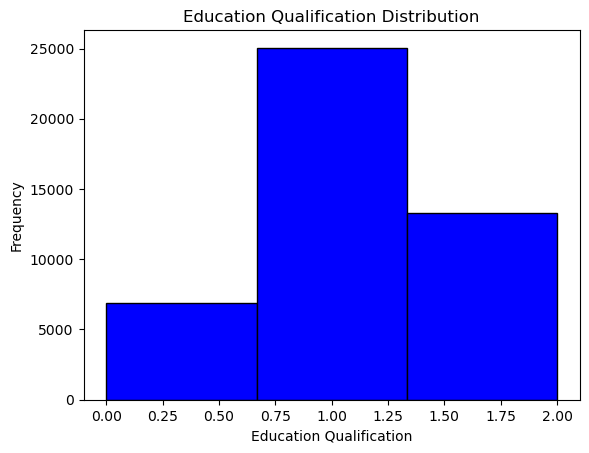

In [277]:
# Plot histogram
plt.hist(dd['education_qual'], bins=3, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Education Qualification')
plt.ylabel('Frequency')
plt.title('Education Qualification Distribution')

# Show the plot
plt.show()

Text(0.5, 1.0, 'education_qual vs y')

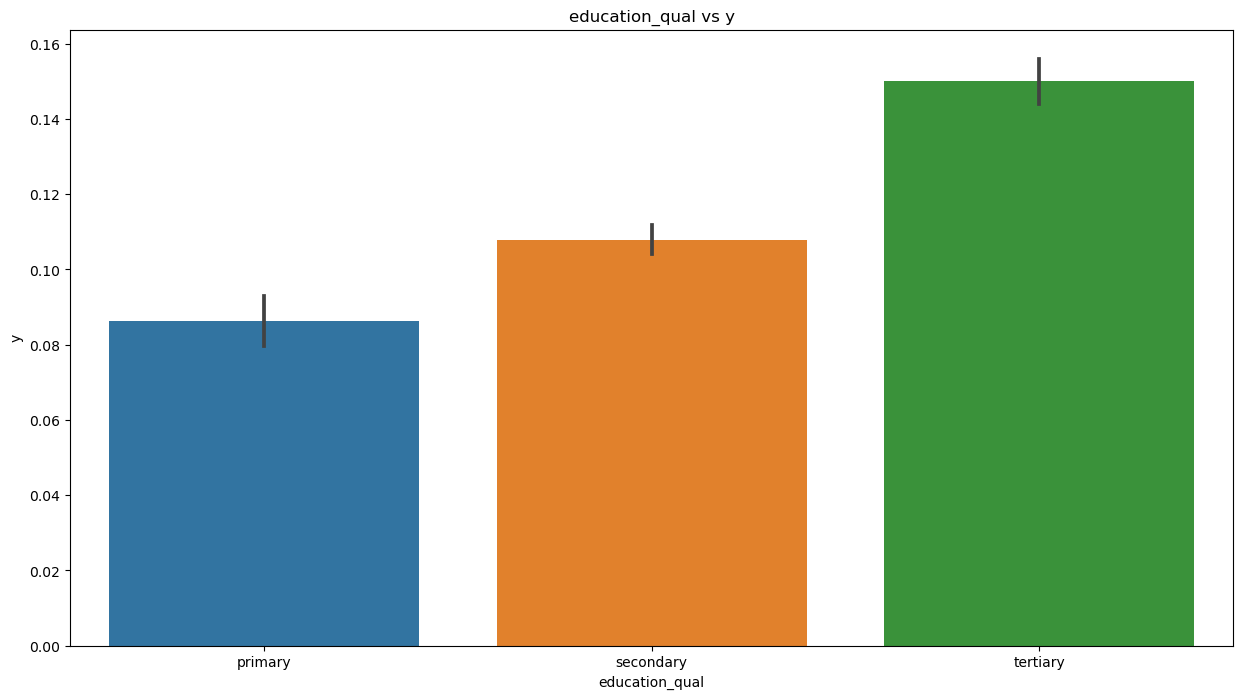

In [71]:
fig = plt.figure(figsize=(15, 8))
education_qual_rates = dd.groupby('education_qual')['y'].mean()
sorted_education_qual =  education_qual_rates.reset_index().sort_values('y')['education_qual']
#plt.xticks(rotation=90) 
sns.barplot(x='education_qual', y='y', data=dd, order=sorted_education_qual )
plt.xlabel('education_qual')
plt.ylabel('y')
plt.title('education_qual vs y')

In [72]:
edu_suc={}
for i in edu:
    edu_suc.update({i : (len(data.loc[(data.education_qual==i) & (data.y==1)]) / len(data.loc[(data.education_qual==i)]))*100})

In [73]:
edu_suc

{'tertiary': 15.008647266711783,
 'secondary': 10.783844189016603,
 'primary': 8.627737226277372}

In [74]:
edu_suc = pd.Series(edu_suc)

In [75]:
edu_suc

tertiary     15.008647
secondary    10.783844
primary       8.627737
dtype: float64

In [76]:
edu_suc = edu_suc.sort_values()

In [77]:
edu_suc

primary       8.627737
secondary    10.783844
tertiary     15.008647
dtype: float64

In [78]:
rankedu = {x: i for i, x in enumerate(edu_suc.index)}

In [79]:
rankedu

{'primary': 0, 'secondary': 1, 'tertiary': 2}

In [80]:
data.education_qual =data.education_qual.map(rankedu)

In [81]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,unknown,5,may,261,1,unknown,0
1,44,4,2,1,unknown,5,may,151,1,unknown,0
2,33,1,0,1,unknown,5,may,76,1,unknown,0
3,47,0,0,1,unknown,5,may,92,1,unknown,0
4,33,0,2,1,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,cellular,17,nov,977,3,unknown,1
45207,71,9,1,0,cellular,17,nov,456,2,unknown,1
45208,72,9,0,1,cellular,17,nov,1127,5,success,1
45209,57,0,0,1,telephone,17,nov,508,4,unknown,0


### 5)call_type

In [82]:
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,unknown,5,may,261,1,unknown,0
1,44,4,2,1,unknown,5,may,151,1,unknown,0
2,33,1,0,1,unknown,5,may,76,1,unknown,0
3,47,0,0,1,unknown,5,may,92,1,unknown,0
4,33,0,2,1,unknown,5,may,198,1,unknown,0


In [83]:
ct = list(data.call_type.unique())

In [84]:
ct

['unknown', 'cellular', 'telephone']

In [85]:
print('% of unknown call_type',round(len(data.loc[data.call_type=='unknown'])*100/len(data),2))

% of unknown call_type 28.8


In [86]:
maxct={}
for i in ct:
    maxct.update({i : (len(data.loc[(data.call_type==i)]) / len(data.education_qual))*100}) 

In [87]:
maxct

{'unknown': 28.79548722486451,
 'cellular': 64.776020351731,
 'telephone': 6.4284924234044905}

### Since % of unknown is high, we can consider it as a label

## EDA

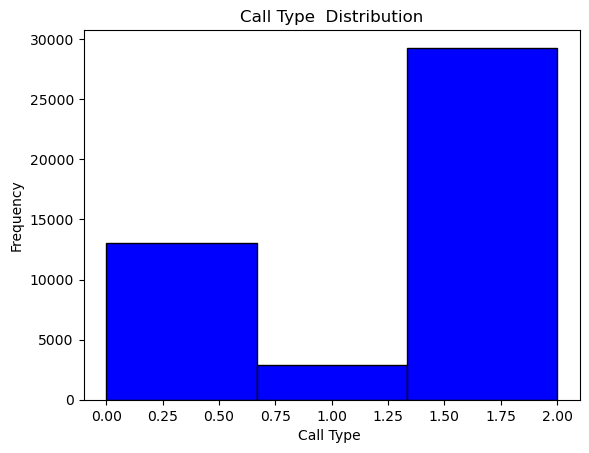

In [278]:
# Plot histogram
plt.hist(dd['call_type'], bins=3, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Call Type ')
plt.ylabel('Frequency')
plt.title('Call Type  Distribution')

# Show the plot
plt.show()

Text(0.5, 1.0, 'call_type vs y')

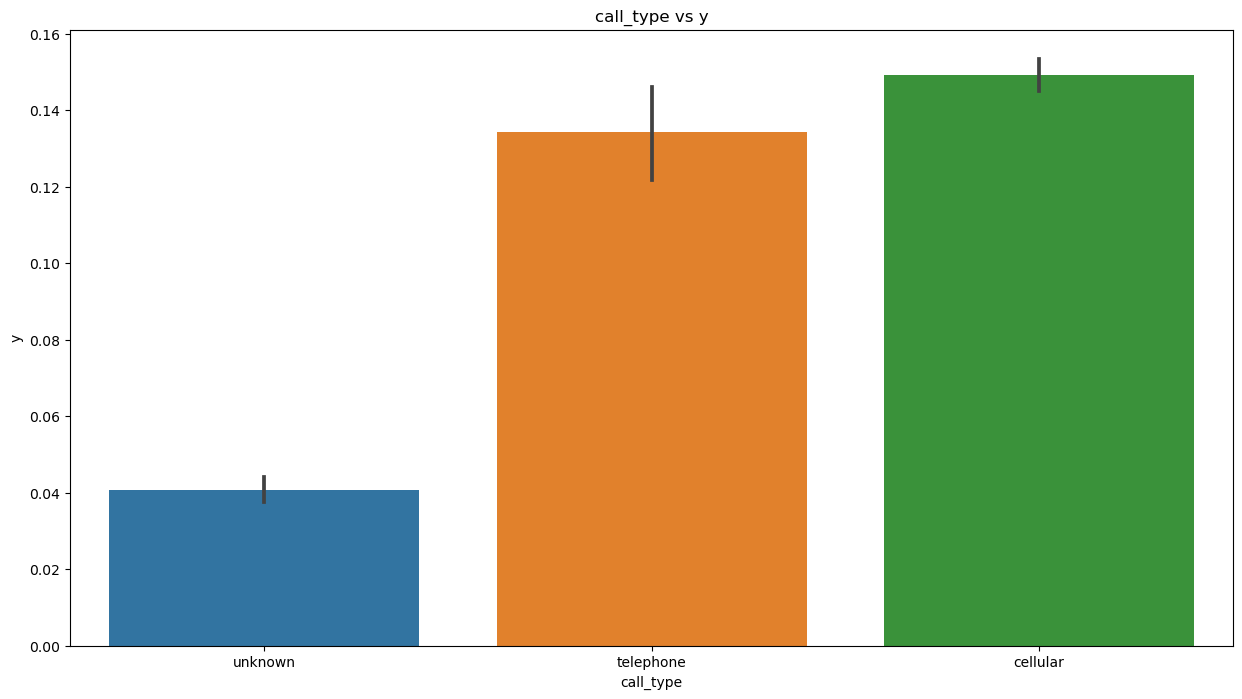

In [89]:
fig = plt.figure(figsize=(15, 8))
call_type_rates = dd.groupby('call_type')['y'].mean()
sorted_call_type =  call_type_rates.reset_index().sort_values('y')['call_type']
#plt.xticks(rotation=90) 
sns.barplot(x='call_type', y='y', data=dd, order=sorted_call_type )
plt.xlabel('call_type')
plt.ylabel('y')
plt.title('call_type vs y')

In [90]:
ct_suc={}
for i in ct:
    ct_suc.update({i : (len(data.loc[(data.call_type==i) & (data.y==1)]) / len(data.loc[(data.call_type==i)]))*100})

In [91]:
ct_suc

{'unknown': 4.071598678650995,
 'cellular': 14.920428932449969,
 'telephone': 13.420509291121817}

In [92]:
ct_suc = pd.Series(ct_suc)

In [93]:
ct_suc = ct_suc.sort_values()

In [94]:
ct_suc

unknown       4.071599
telephone    13.420509
cellular     14.920429
dtype: float64

In [95]:
ctrank = {x: i for i, x in enumerate(ct_suc.index)}

In [96]:
ctrank

{'unknown': 0, 'telephone': 1, 'cellular': 2}

In [97]:
data.call_type =data.call_type.map(ctrank)

### 6) day

In [98]:
data.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [99]:
da = list(data.day.unique())

In [100]:
da

[5,
 6,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 21,
 23,
 26,
 27,
 28,
 29,
 30,
 2,
 3,
 4,
 11,
 17,
 18,
 24,
 25,
 1,
 10,
 22,
 31]

## EDA

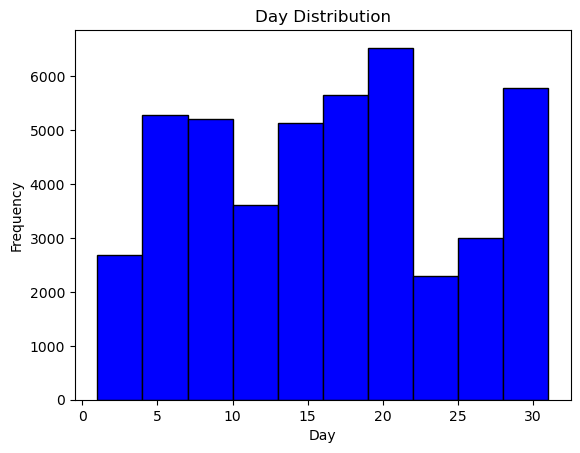

In [101]:
# Plot histogram
plt.hist(dd['day'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Day Distribution')

# Show the plot
plt.show()

In [102]:
#fig = plt.figure(figsize=(15, 8))
#day_rates = dd.groupby('day')['y'].mean()
#sorted_day =  day_rates.reset_index().sort_values('day')['day']
##plt.xticks(rotation=90) 
#sns.barplot(x='day', y='y', data=dd, order=sorted_day )

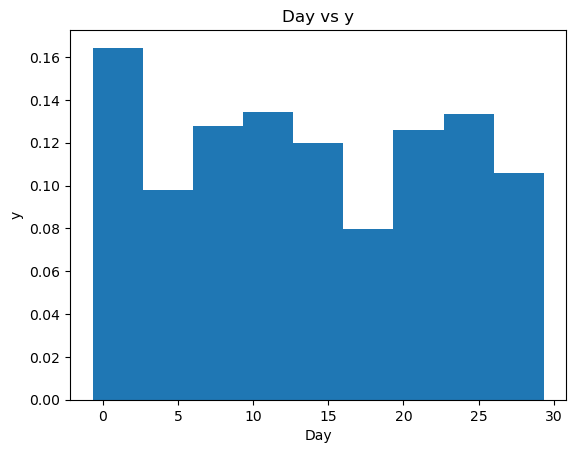

In [103]:
bins = np.linspace(dd.day.min(),dd.day.max(), 10)
c=np.digitize(dd.day,bins)
plt.bar(bins[:-1], [np.mean(dd.y.values[c == i]) for i in range(1, len(bins))], width= bins[1] - bins[0])
# Add labels and title
plt.xlabel('Day')
plt.ylabel('y')
plt.title('Day vs y')
plt.show()

### 7)mon 

In [104]:
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,may,261,1,unknown,0
1,44,4,2,1,0,5,may,151,1,unknown,0
2,33,1,0,1,0,5,may,76,1,unknown,0
3,47,0,0,1,0,5,may,92,1,unknown,0
4,33,0,2,1,0,5,may,198,1,unknown,0


In [105]:
mas = list(data.mon.unique())

In [106]:
mas

['may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'jan',
 'feb',
 'mar',
 'apr',
 'sep']

## EDA

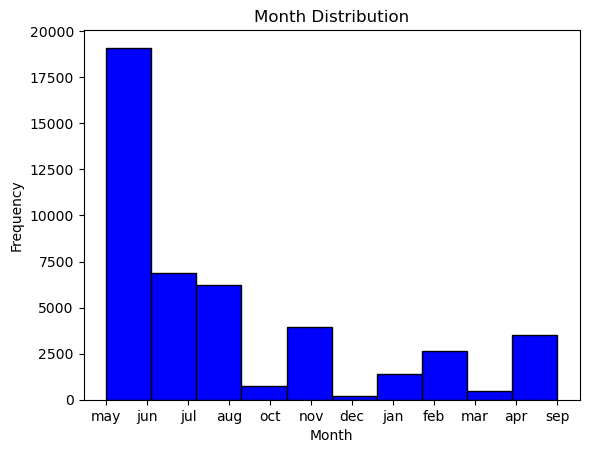

In [107]:
# Plot histogram
plt.hist(dd['mon'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Month Distribution')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Month vs y')

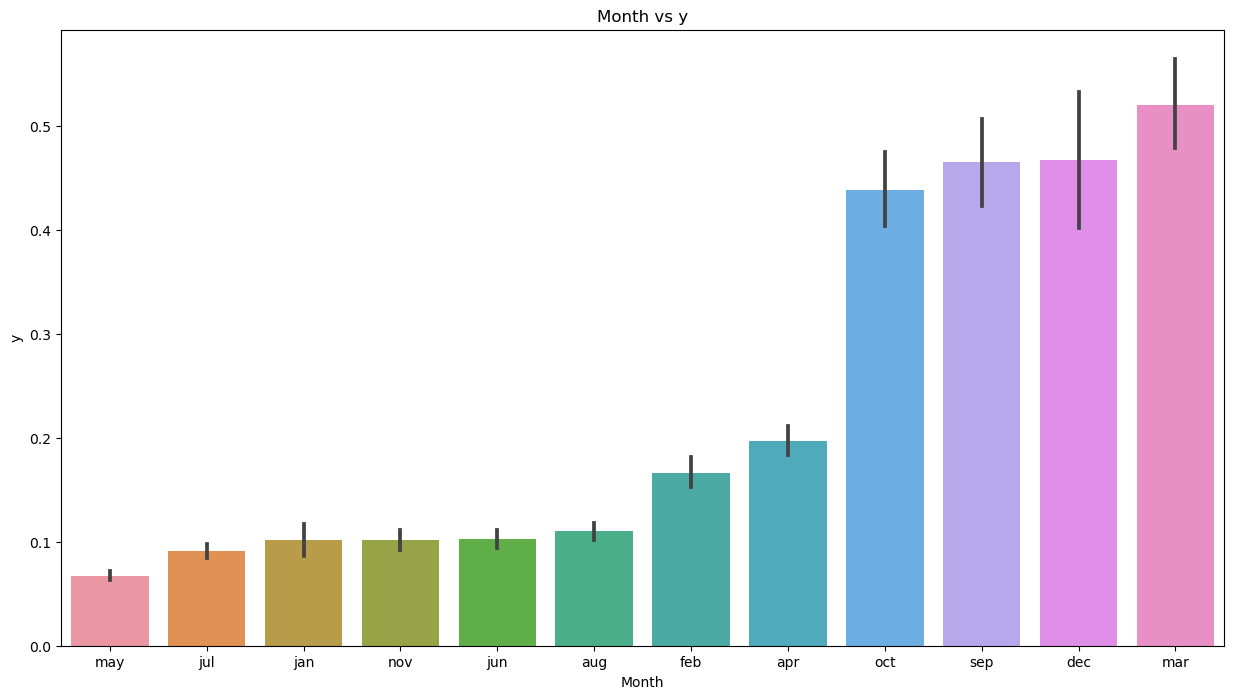

In [108]:
fig = plt.figure(figsize=(15, 8))
mon_rates = dd.groupby('mon')['y'].mean()
sorted_mon =  mon_rates.reset_index().sort_values('y')['mon']
#plt.xticks(rotation=90) 
sns.barplot(x='mon', y='y', data=dd, order=sorted_mon )
plt.xlabel('Month')
plt.ylabel('y')
plt.title('Month vs y')

In [109]:
m_suc={}
for i in mas:
    m_suc.update({i : (len(data.loc[(data.mon==i) & (data.y==1)]) / len(data.loc[(data.mon==i)]))*100})

In [110]:
m_suc

{'may': 6.719941881583727,
 'jun': 10.226634201161266,
 'jul': 9.094865100087032,
 'aug': 11.016813450760608,
 'oct': 43.766937669376695,
 'nov': 10.151133501259446,
 'dec': 46.728971962616825,
 'jan': 10.121168923734853,
 'feb': 16.64779161947905,
 'mar': 51.99161425576519,
 'apr': 19.679399727148706,
 'sep': 46.45941278065631}

In [111]:
m_suc = pd.Series(m_suc)

In [112]:
m_suc = m_suc.sort_values()

In [113]:
m_suc

may     6.719942
jul     9.094865
jan    10.121169
nov    10.151134
jun    10.226634
aug    11.016813
feb    16.647792
apr    19.679400
oct    43.766938
sep    46.459413
dec    46.728972
mar    51.991614
dtype: float64

In [114]:
mrank = {x: i for i, x in enumerate(m_suc.index)}

In [115]:
mrank

{'may': 0,
 'jul': 1,
 'jan': 2,
 'nov': 3,
 'jun': 4,
 'aug': 5,
 'feb': 6,
 'apr': 7,
 'oct': 8,
 'sep': 9,
 'dec': 10,
 'mar': 11}

In [116]:
data.mon =data.mon.map(mrank)

In [117]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,unknown,0
1,44,4,2,1,0,5,0,151,1,unknown,0
2,33,1,0,1,0,5,0,76,1,unknown,0
3,47,0,0,1,0,5,0,92,1,unknown,0
4,33,0,2,1,0,5,0,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,unknown,1
45207,71,9,1,0,2,17,3,456,2,unknown,1
45208,72,9,0,1,2,17,3,1127,5,success,1
45209,57,0,0,1,1,17,3,508,4,unknown,0


### 8)dur

In [118]:
du = list(data.dur.unique())

In [119]:
len(du)

1573

### Clipping the outliers 

In [120]:
iqr = data['dur'].quantile(0.75) - data['dur'].quantile(0.25)
upper_threshold = data['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['dur'].quantile(0.25) - (1.5 * iqr)
print('UT  -',round(upper_threshold,3),'LT  -', round(lower_threshold,3))
print('Max -',round(data['dur'].max(),3),'Min -',round(data['dur'].min(),3))

UT  - 643.0 LT  - -221.0
Max - 4918 Min - 0


In [121]:
data.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [122]:
data.dur = data.dur.clip(min(data.dur), upper_threshold)
data.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

## EDA

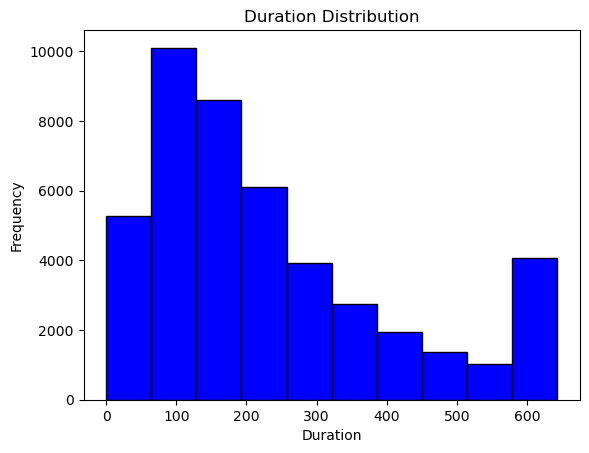

In [123]:
# Plot histogram
plt.hist(dd['dur'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration Distribution')

# Show the plot
plt.show()

In [124]:
#fig = plt.figure(figsize=(15, 8))
#dur_rates = dd.groupby('dur')['y'].mean()
#sorted_dur =  dur_rates.reset_index().sort_values('dur')['dur']
##plt.xticks(rotation=90) 
#sns.barplot(x='dur', y='y', data=dd, order=sorted_dur )

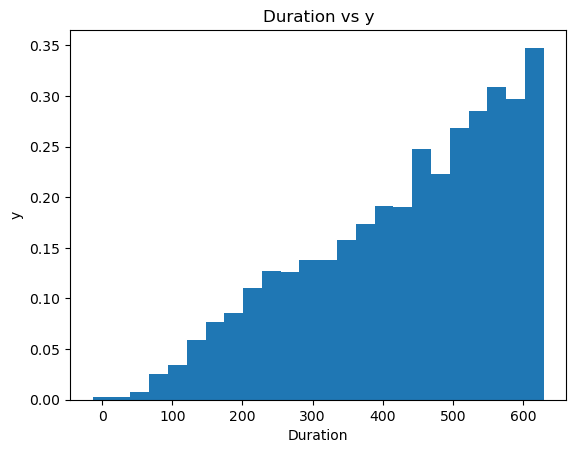

In [125]:
bins = np.linspace(dd.dur.min(),dd.dur.max(), 25)
c=np.digitize(dd.dur,bins)
plt.bar(bins[:-1], [np.mean(dd.y.values[c == i]) for i in range(1, len(bins))], width= bins[1] - bins[0])
# Add labels and title
plt.xlabel('Duration')
plt.ylabel('y')
plt.title('Duration vs y')
plt.show()

### 9)num_calls

In [126]:
num=data.num_calls.unique()

In [127]:
num

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

### Clipping the outliers

In [128]:
iqr = data['num_calls'].quantile(0.75) - data['num_calls'].quantile(0.25)
upper_threshold = data['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['num_calls'].quantile(0.25) - (1.5 * iqr)
print('UT  -',round(upper_threshold,3),'LT  -', round(lower_threshold,3))
print('Max -',round(data['num_calls'].max(),3),'Min -',round(data['num_calls'].min(),3))

UT  - 6.0 LT  - -2.0
Max - 63 Min - 1


In [129]:
data.num_calls.describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [130]:
data.num_calls = data.num_calls.clip(min(data.num_calls), upper_threshold)
data.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

## EDA

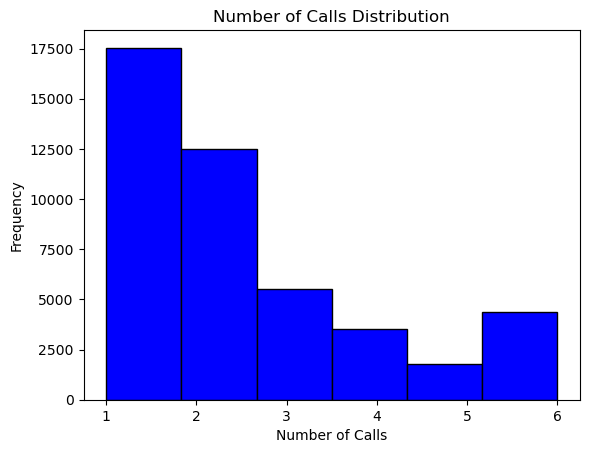

In [279]:
# Plot histogram
plt.hist(dd['num_calls'], bins=6, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Number of Calls Distribution')

# Show the plot
plt.show()

Text(0.5, 1.0, 'num_calls vs y')

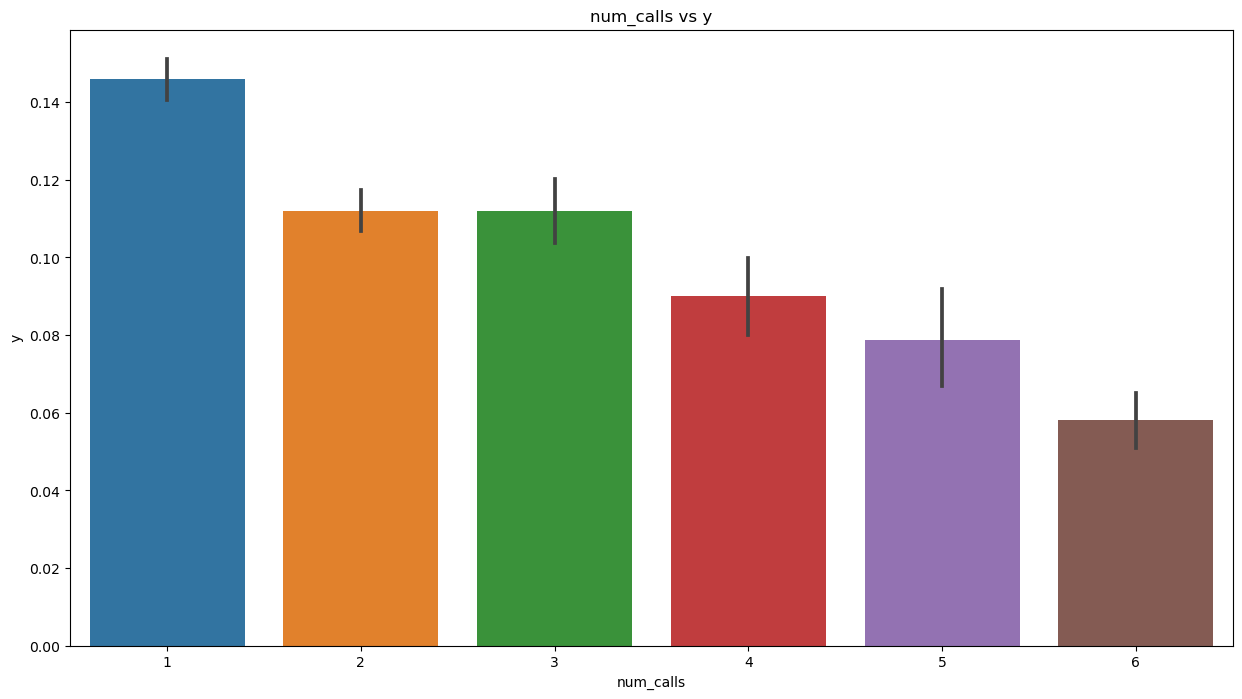

In [132]:
fig = plt.figure(figsize=(15, 8))
num_calls_rates = dd.groupby('num_calls')['y'].mean()
sorted_num_calls =  num_calls_rates.reset_index().sort_values('num_calls')['num_calls']
#plt.xticks(rotation=90) 
sns.barplot(x='num_calls', y='y', data=dd, order=sorted_num_calls )
plt.xlabel('num_calls')
plt.ylabel('y')
plt.title('num_calls vs y')

### 9)prev_outcome

In [133]:
pre = list(data.prev_outcome.unique())

In [134]:
pre

['unknown', 'failure', 'other', 'success']

In [135]:
print('% of unknown prev_outcome',round(len(data.loc[data.prev_outcome=='unknown'])*100/len(data),2))

% of unknown prev_outcome 81.75


In [136]:
maxnum={}
for i in pre:
    maxnum.update({i : (len(data.loc[(data.prev_outcome==i)]) / len(data.prev_outcome))*100}) 

In [137]:
maxnum

{'unknown': 81.74538214799247,
 'failure': 10.841721048556575,
 'other': 4.070346200641522,
 'success': 3.3425506028094234}

### Since % of unknown is high, we can consider it as a label

## EDA

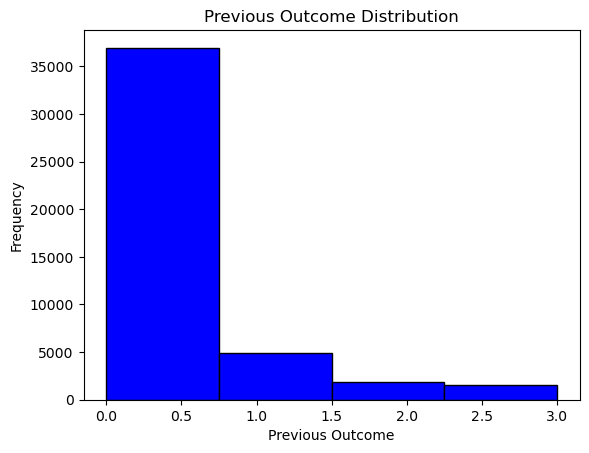

In [280]:
# Plot histogram
plt.hist(dd['prev_outcome'], bins=4, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Previous Outcome')
plt.ylabel('Frequency')
plt.title('Previous Outcome Distribution')

# Show the plot
plt.show()

Text(0.5, 1.0, 'prev_outcome vs y')

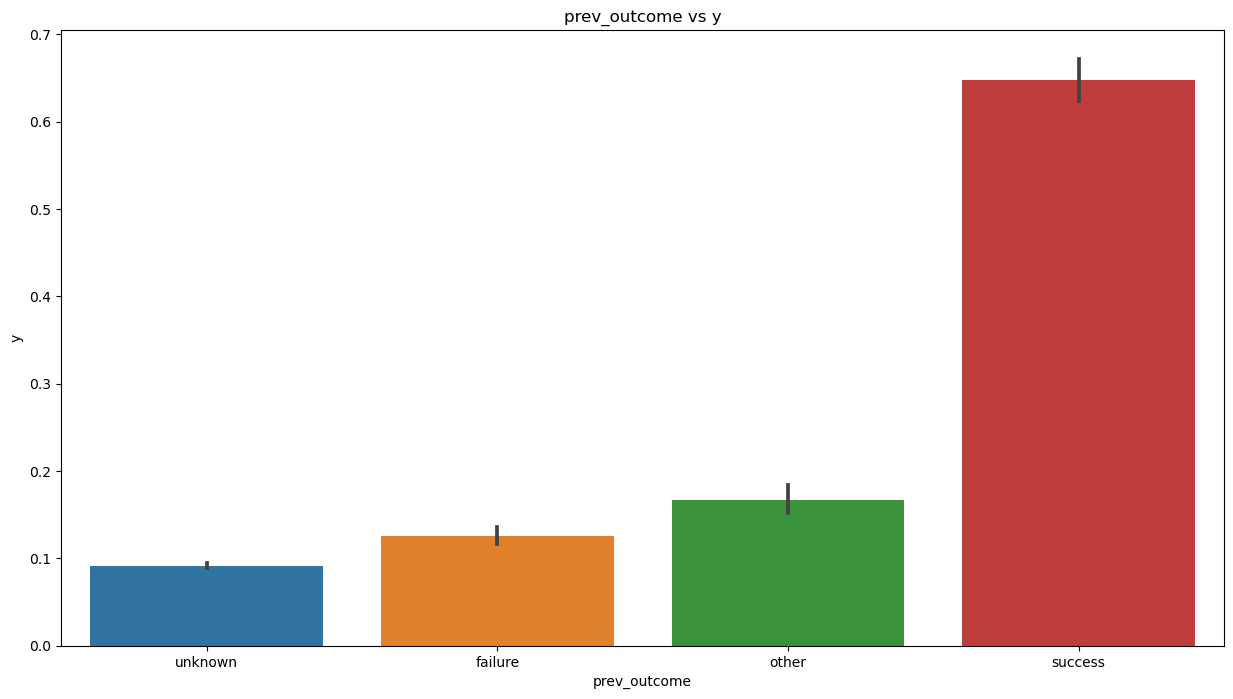

In [139]:
fig = plt.figure(figsize=(15, 8))
prev_outcome_rates = dd.groupby('prev_outcome')['y'].mean()
sorted_prev_outcome =  prev_outcome_rates.reset_index().sort_values('y')['prev_outcome']
#plt.xticks(rotation=90) 
sns.barplot(x='prev_outcome', y='y', data=dd, order=sorted_prev_outcome)
plt.xlabel('prev_outcome')
plt.ylabel('y')
plt.title('prev_outcome vs y')

In [140]:
p_suc={}
for i in pre:
    p_suc.update({i : (len(data.loc[(data.prev_outcome==i) & (data.y==1)]) / len(data.loc[(data.prev_outcome==i)]))*100})

In [141]:
p_suc

{'unknown': 9.162990826184613,
 'failure': 12.609671495613139,
 'other': 16.684782608695652,
 'success': 64.72534745201854}

In [142]:
p_suc = pd.Series(p_suc)

In [143]:
p_suc = p_suc.sort_values()

In [144]:
p_suc

unknown     9.162991
failure    12.609671
other      16.684783
success    64.725347
dtype: float64

In [145]:
prank = {x: i for i, x in enumerate(p_suc.index)}

In [146]:
prank

{'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}

In [147]:
data.prev_outcome =data.prev_outcome.map(prank)

In [148]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,643,3,0,1
45207,71,9,1,0,2,17,3,456,2,0,1
45208,72,9,0,1,2,17,3,643,5,3,1
45209,57,0,0,1,1,17,3,508,4,0,0


In [149]:
data.sample(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
4191,38,1,0,1,0,19,0,144,2,0,0
36750,39,7,2,2,2,12,0,561,4,1,0
12971,27,0,2,0,2,7,1,447,3,0,0
41304,31,7,2,2,2,27,5,125,6,0,0
32542,47,0,0,1,2,17,7,41,1,2,0


### Splitting Data

In [150]:
X = data.iloc[:,:10] #array of features
y = data.iloc[:,-1] #array of targets

In [151]:
len(X),len(y)

(45205, 45205)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [153]:
len(X_train),len(X_test)

(36164, 9041)

### Scaling

In [154]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing

### y-target - checking for Imbalance

In [155]:
y = list(data.y.unique())

In [156]:
y

[0, 1]

In [157]:
fail = len(data.loc[data.y==0])*100/len(data)
sux = len(data.loc[data.y==1])*100/len(data)

In [158]:
fail+sux, fail, sux

(100.0, 88.29996681782988, 11.700033182170113)

In [159]:
imb = [fail,sux]

In [160]:
imb

[88.29996681782988, 11.700033182170113]

In [161]:
imb = pd.DataFrame(imb, columns=['% Split'], index = ['Fail','Success'])

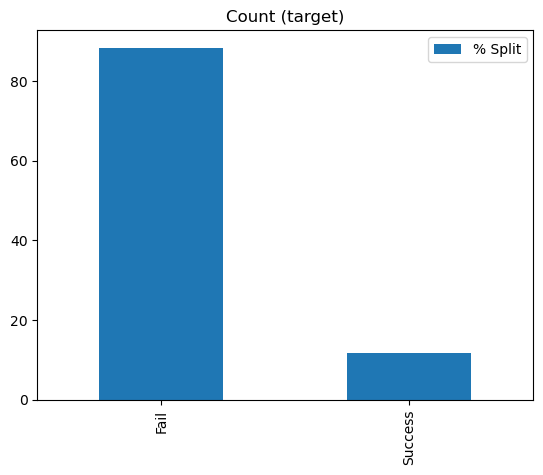

In [162]:
imb.plot(kind='bar', title='Count (target)');

In [163]:
imb

,% Split
Fail,88.299967
Success,11.700033


In [164]:
X = data.iloc[:,:10]

In [165]:
len(X.columns)

10

In [166]:
X.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

In [167]:
y = data.loc[:,'y']

In [168]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

In [169]:
len(y[y==0])*100/len(y),len(y[y==1])*100/len(y)

(88.29996681782988, 11.700033182170113)

In [170]:
len(y[y==0])+len(y[y==1])-len(y)

0

## Performing - SMOTEENN

In [171]:
from imblearn.combine import SMOTEENN


smt = SMOTEENN(sampling_strategy='all')
X_train_upd, y_train_upd = smt.fit_resample(X_train, y_train)

In [172]:
len(X_train_upd),len(y_train_upd)

(56464, 56464)

In [173]:
y_train_upd.shape,X_train_upd.shape

((56464,), (56464, 10))

In [174]:
col = X.columns
col = pd.Series(col)

In [175]:
col = col.append(pd.Series('y'),ignore_index = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13652\1797620627.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  col = col.append(pd.Series('y'),ignore_index = True)


In [176]:
col

0                age
1                job
2            marital
3     education_qual
4          call_type
5                day
6                mon
7                dur
8          num_calls
9       prev_outcome
10                 y
dtype: object

In [177]:
Xpd = pd.DataFrame(X_train_upd)
ypd = pd.DataFrame(y_train_upd)

In [178]:
df = pd.concat([Xpd,ypd],axis=1)

In [179]:
len(df)

56464

In [180]:
df.columns = col.values

In [181]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.006886,-0.081560,-0.768973,-0.218759,0.711023,0.386083,0.785253,0.316024,-0.243462,-0.416460,0
1,-1.218400,0.930756,1.488996,1.315610,-1.518820,1.228250,0.417314,0.378408,1.009143,-0.416460,0
2,0.101138,-1.431316,-0.768973,-0.218759,-1.518820,-0.817014,-1.054441,-0.251102,0.382840,-0.416460,0
3,-0.370125,0.930756,-0.768973,1.315610,0.711023,0.626702,-0.686502,0.673313,-0.243462,-0.416460,0
4,-1.406905,-0.081560,1.488996,-0.218759,-1.518820,-0.335775,-1.054441,-0.494967,-0.869764,-0.416460,0
...,...,...,...,...,...,...,...,...,...,...,...
56459,1.567926,0.062542,0.360011,1.315610,0.711023,-0.145250,0.785253,0.143808,-0.869764,-0.416460,1
56460,-1.399223,1.013265,1.488996,1.315610,0.711023,0.096434,0.725275,-0.427285,-0.818717,1.011245,1
56461,-1.390733,-0.110510,1.488996,-0.218759,0.711023,-1.208907,2.288573,0.993306,-0.869764,2.561435,1
56462,1.321534,-1.431316,-0.768973,-1.753129,-0.169345,-0.044535,-0.977035,1.434653,0.745623,-0.416460,1


In [182]:
l0=df[['age','dur']].values
k0=df['y'].values

In [183]:
l1=data[['age','dur']].values
k1=data['y'].values

In [184]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

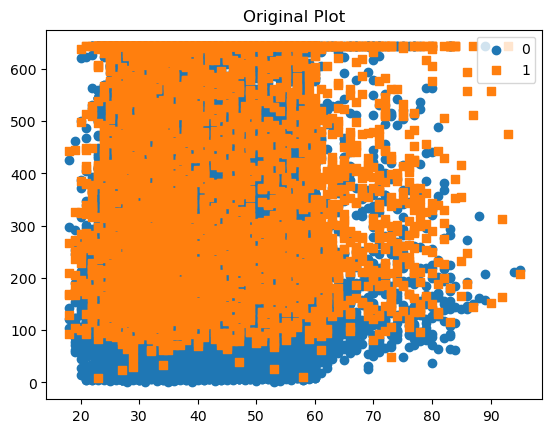

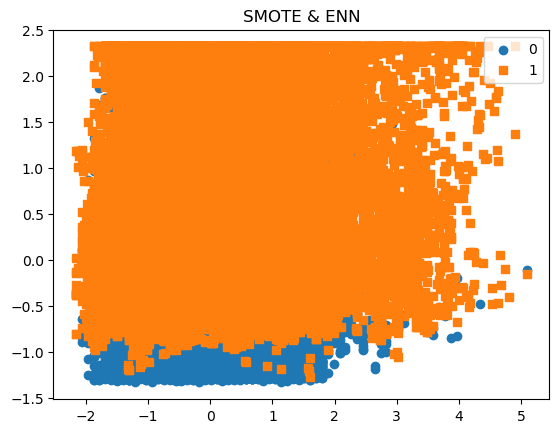

In [185]:
plot_2d_space(l1,k1, 'Original Plot')
plot_2d_space(l0,k0, 'SMOTE & ENN')

In [186]:
fail = len(df.loc[df.y==0])*100/len(df)
sux = len(df.loc[df.y==1])*100/len(df)

In [187]:
fail+sux,fail,sux

(100.0, 45.99922074241995, 54.00077925758005)

<Axes: title={'center': 'Count (target)'}>

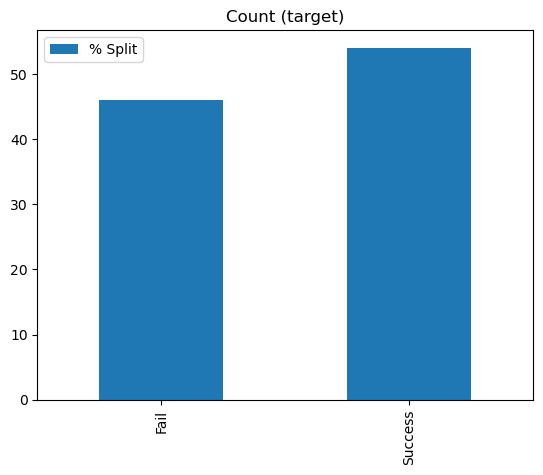

In [188]:
imb = [fail,sux]
imb = pd.DataFrame(imb, columns=['% Split'], index = ['Fail','Success'])
imb.plot(kind='bar', title='Count (target)')

In [189]:
X = df.iloc[:,:10] #array of features
y = df.iloc[:,-1] #array of targets

## Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_upd,y_train_upd)

LogisticRegression()

### comparing target with its prediction

In [191]:
pred_lr =log.predict(X_test)

In [192]:
ytest=y_test.values

In [193]:
pred_test = pd.DataFrame({'target': ytest, 'prediction' : pred_lr})

In [194]:
pred_test.sample(10)

,target,prediction
1129,0,0
6305,0,0
6465,0,0
6591,0,0
3301,0,0
6493,0,0
8944,0,1
4261,1,1
8343,0,0
397,1,1


## Calculating Loss Function

F1 Score

In [195]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels stored in y_pred and true labels in y_true
f_1 = f1_score(pred_test.target, pred_test.prediction)

print("F1 score:", f_1)


F1 score: 0.4799999999999999


In [196]:
f1 = {'logistic Regression':round(f_1,2)}

In [197]:
f1

{'logistic Regression': 0.48}

# KNN Algorithm

### finding the hyperparameter - k

## Using Stratified K fold - for dividing labels equally during CV - k fold

In [198]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [199]:
d = []
train_score = []
cv_score = []

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(X_train_upd,y_train_upd) # training the model
    d.append(i)
    train_score.append(knn.score(X_train_upd, y_train_upd))
    
    # Before finding CV - always initialize the model
    knn = KNeighborsClassifier(i) #initialising the model
    for train_index, test_index in skf.split(X.values, y):
        X_trainsk, X_testsk = X.values[train_index], X.values[test_index]
        y_trainsk, y_testsk = y.values[train_index], y.values[test_index]
        knn.fit(X_trainsk, y_trainsk)
        y_predsk = knn.predict(X_testsk)
        c_v = f1_score(y_testsk, y_predsk)
        cvv = np.sum(c_v)
        cv_score.append(cvv)


In [200]:
len(d),len(train_score),len(cv_score)

(12, 12, 120)

In [201]:
cvs=[]
for i in range(0,len(cv_score),10):
    summ=0
    summ = (summ + cv_score[i] + cv_score[i+1]+ cv_score[i+2]+ cv_score[i+2]+ cv_score[i+4])/10
    cvs.append(summ)

In [202]:
len(cvs)

12

In [203]:
score = {'k':d,'Train_Score':train_score,'CV_Score':cvs}
score = pd.DataFrame(score)

In [204]:
score

,k,Train_Score,CV_Score
0,1,1.000000,0.498577
1,2,0.999805,0.498510
2,3,0.997963,0.496025
3,4,0.997645,0.496232
4,5,0.993890,0.493018
5,6,0.994173,0.493148
6,7,0.988896,0.490038
7,8,0.989126,0.490178
8,9,0.982785,0.487618
9,10,0.983813,0.487666


In [205]:
max(score.CV_Score)

0.4985765303916277

## will use k=2

In [206]:
knn = KNeighborsClassifier(2) 
knn.fit(X_train_upd,y_train_upd)

KNeighborsClassifier(n_neighbors=2)

## comparing target with its prediction

In [207]:
pred_knn = knn.predict(X_test)

In [208]:
ytest=y_test.values

In [209]:
pred_kn = pd.DataFrame({'target': ytest, 'prediction' : pred_knn})

In [210]:
pred_kn.sample(5)

,target,prediction
3644,0,0
4293,0,0
2561,0,0
3789,1,1
7880,0,0


### Calculating Loss Function

In [211]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels stored in y_pred and true labels in y_true
f_1 = f1_score(pred_kn.target, pred_kn.prediction)

print("F1 score:", f_1)


F1 score: 0.5033967391304348


In [212]:
f1.update({'KNN':round(f_1,2)})

In [213]:
f1

{'logistic Regression': 0.48, 'KNN': 0.5}

## Decision Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier

### finding the hyperparameter - depth of the tree

## Using Stratified K fold - for dividing labels equally during CV - k fold  

In [215]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [216]:
d = []
train_score = []
cv_score = []

for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 50, 60, 80, 100,200,400,500]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_upd, y_train_upd)
    d.append(depth)
    train_score.append(dt.score(X_train_upd, y_train_upd))
    
    # Before finding CV - always initialize the model
    dt = DecisionTreeClassifier(max_depth=depth)
    for train_index, test_index in skf.split(X.values, y):
        X_trainsk, X_testsk = X.values[train_index], X.values[test_index]
        y_trainsk, y_testsk = y.values[train_index], y.values[test_index]
        dt.fit(X_trainsk, y_trainsk)
        y_predsk = dt.predict(X_testsk)
        c_v = f1_score(y_testsk, y_predsk)
        cvv = np.sum(c_v)
        cv_score.append(cvv)


In [217]:
len(d),len(train_score),len(cv_score)

(19, 19, 190)

In [218]:
cvs=[]
for i in range(0,len(cv_score),10):
    summ=0
    summ = (summ + cv_score[i] + cv_score[i+1]+ cv_score[i+2]+ cv_score[i+2]+ cv_score[i+4])/10
    cvs.append(summ)

In [219]:
len(cvs)

19

In [220]:
score = {'Depth':d,'Train_Score':train_score,'CV_Score':cvs}
score = pd.DataFrame(score)

In [221]:
score

,Depth,Train_Score,CV_Score
0,1,0.767516,0.396097
1,2,0.791779,0.413329
2,3,0.865472,0.440206
3,4,0.867048,0.440390
4,5,0.887450,0.445999
5,6,0.899812,0.452175
6,7,0.907693,0.456348
7,8,0.920268,0.458485
8,9,0.940103,0.466773
9,10,0.951066,0.469674


In [222]:
max(score.CV_Score)

0.47622574887106534

## will use Tree depth = 60

In [223]:
dt = DecisionTreeClassifier(max_depth=60)
dt.fit(X_train_upd, y_train_upd)

DecisionTreeClassifier(max_depth=60)

### comparing target with its prediction

In [224]:
pred_dt =dt.predict(X_test)

In [225]:
ytest=y_test.values

In [226]:
pred_dt = pd.DataFrame({'target': ytest, 'prediction' : pred_dt})

In [227]:
pred_dt

,target,prediction
0,0,0
1,1,1
2,0,1
3,0,0
4,0,1
...,...,...
9036,0,0
9037,0,0
9038,0,0
9039,0,0


## Calculating Loss Function

In [228]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels stored in y_pred and true labels in y_true
f_1 = f1_score(pred_dt.target, pred_dt.prediction)

print("F1 score:", f_1)


F1 score: 0.5466534784042202


In [229]:
f1.update({'Decision tree':round(f_1,2)})

In [230]:
f1

{'logistic Regression': 0.48, 'KNN': 0.5, 'Decision tree': 0.55}

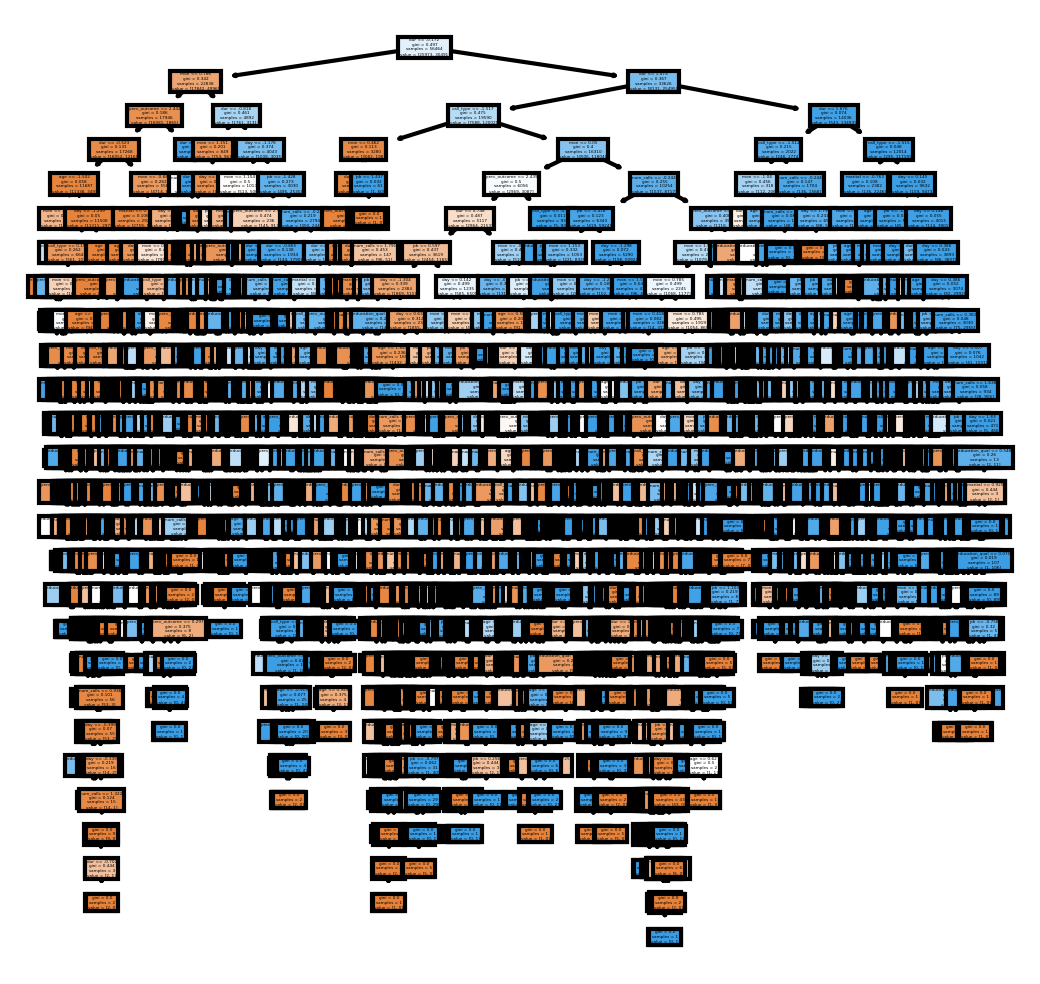

In [231]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X.columns,
               filled = True);

## Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier

## finding the hyperparameter - depth of the Forest

### Using Stratified K fold - for dividing labels equally during CV - k fold

In [233]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [234]:
d = []
train_score = []
cv_score = []

for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 50, 60, 80, 100,200,400,500]:
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_train_upd, y_train_upd)
    d.append(depth)
    train_score.append(rf.score(X_train_upd, y_train_upd))
    
    # Before finding CV - always initialize the model
    rf = RandomForestClassifier(max_depth=depth)
    for train_index, test_index in skf.split(X.values, y):
        X_trainsk, X_testsk = X.values[train_index], X.values[test_index]
        y_trainsk, y_testsk = y.values[train_index], y.values[test_index]
        rf.fit(X_trainsk, y_trainsk)
        y_predsk = rf.predict(X_testsk)
        c_v = f1_score(y_testsk, y_predsk)
        cvv = np.sum(c_v)
        cv_score.append(cvv)


In [235]:
len(d),len(train_score),len(cv_score)

(19, 19, 190)

In [236]:
cvs=[]
for i in range(0,len(cv_score),10):
    summ=0
    summ = (summ + cv_score[i] + cv_score[i+1]+ cv_score[i+2]+ cv_score[i+2]+ cv_score[i+4])/10
    cvs.append(summ)

In [237]:
len(cvs)

19

In [238]:
score = {'Depth':d,'Train_Score':train_score,'CV_Score':cvs}
score = pd.DataFrame(score)

In [239]:
score

,Depth,Train_Score,CV_Score
0,1,0.792965,0.411325
1,2,0.865667,0.440738
2,3,0.884812,0.446422
3,4,0.904328,0.454280
4,5,0.912900,0.457566
5,6,0.921561,0.461199
6,7,0.931780,0.465079
7,8,0.939271,0.468161
8,9,0.949260,0.471371
9,10,0.957105,0.473823


In [240]:
max(score.CV_Score)

0.4878953205489709

## will use Tree depth = 100

In [241]:
dt = DecisionTreeClassifier(max_depth=100)
dt.fit(X_train_upd, y_train_upd)

DecisionTreeClassifier(max_depth=100)

## comparing target with its prediction

In [242]:
pred_rf =dt.predict(X_test)

In [243]:
ytest = y_test.values

In [244]:
pred_rf = pd.DataFrame({'target': ytest, 'prediction' : pred_rf})

In [245]:
pred_rf

,target,prediction
0,0,0
1,1,1
2,0,1
3,0,0
4,0,1
...,...,...
9036,0,0
9037,0,0
9038,0,0
9039,0,0


## Calculating F1 Score

In [246]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels stored in y_pred and true labels in y_true
f_1 = f1_score(pred_rf.target, pred_rf.prediction)

print("F1 score:", f_1)


F1 score: 0.5455746367239103


In [247]:
f1.update({'Random Forest':round(f_1,2)})

In [248]:
f1

{'logistic Regression': 0.48,
 'KNN': 0.5,
 'Decision tree': 0.55,
 'Random Forest': 0.55}

# XGBOOST

In [249]:
import xgboost as xgb

### finding the hyperparameter - depth of the Forest

### Using Stratified K fold - for dividing labels equally during CV - k fold

In [250]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [251]:
from sklearn.metrics import f1_score

In [252]:
d = []
train_score = []
cv_score = []
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    xg = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
    xg.fit(X_train_upd, y_train_upd)
    d.append(lr)
    train_score.append(xg.score(X_train_upd, y_train_upd))
    
    xg = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
    for train_index, test_index in skf.split(X.values, y):
        X_trainsk, X_testsk = X.values[train_index], X.values[test_index]
        y_trainsk, y_testsk = y.values[train_index], y.values[test_index]
        xg.fit(X_trainsk, y_trainsk)
        y_predsk = xg.predict(X_testsk)
        threshold = 0.5  # Define the threshold for classification
        # Convert continuous predictions into binary values
        y_pred_binary = (y_predsk > threshold).astype(int)
        c_v = f1_score(y_testsk, y_pred_binary)
        cvv = np.sum(c_v)
        cv_score.append(cvv)


In [253]:
len(d),len(train_score),len(cv_score)

(19, 19, 190)

In [254]:
cvs=[]
for i in range(0,len(cv_score),10):
    summ=0
    summ = (summ + cv_score[i] + cv_score[i+1]+ cv_score[i+2]+ cv_score[i+2]+ cv_score[i+4])/10
    cvs.append(summ)

In [255]:
len(cvs)

19

In [256]:
score = {'Learning Rate':d,'Train_Score':train_score,'CV_Score':cvs}
score = pd.DataFrame(score)

In [257]:
score

,Learning Rate,Train_Score,CV_Score
0,0.01,0.648029,0.461871
1,0.02,0.775227,0.465999
2,0.03,0.814838,0.469397
3,0.04,0.840976,0.471882
4,0.05,0.857236,0.473832
5,0.06,0.869482,0.475753
6,0.07,0.881381,0.476862
7,0.08,0.886187,0.477363
8,0.09,0.892259,0.478292
9,0.10,0.895800,0.478260


In [258]:
max(score.CV_Score)

0.4787760756604598

### will use Learning Rate = 0.13

In [259]:
xg = xgb.XGBRegressor(learning_rate = 0.13, n_estimators=100, verbosity = 0)
xg.fit(X_train_upd, y_train_upd)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.13, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## comparing target with its prediction

In [260]:
pred_xg = xg.predict(X_test)

In [261]:
ytest = y_test.values

In [262]:
threshold = 0.5  # Define the threshold for classification
# Convert continuous predictions into binary values
pred_xg1 = (pred_xg > threshold).astype(int)

In [263]:
pred_xg1

array([0, 1, 1, ..., 0, 0, 0])

In [264]:
pred_xg = pd.DataFrame({'target': ytest, 'prediction' : pred_xg1})

In [265]:
pred_xg

,target,prediction
0,0,0
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
9036,0,0
9037,0,0
9038,0,0
9039,0,0


## Calculating F1 Score

In [266]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels stored in y_pred and true labels in y_true
f_1 = f1_score(pred_xg.target, pred_xg.prediction)

print("F1 score:", f_1)


F1 score: 0.5823111684958038


In [267]:
f1.update({'XG Boost ':round(f_1,2)})

In [268]:
f1

{'logistic Regression': 0.48,
 'KNN': 0.5,
 'Decision tree': 0.55,
 'Random Forest': 0.55,
 'XG Boost ': 0.58}

# From the F1 Scores, we can see that XG - Boost is the best model

### Now, will analyse the important features of XG-BOOST Model

In [269]:
from matplotlib import pyplot
xg = xgb.XGBRegressor(learning_rate = 0.13, n_estimators=100, verbosity = 0)

# Fit xg to the training set
xg.fit(X_train_upd, y_train_upd)
importance = xg.feature_importances_

In [270]:
imp1 = list(zip(importance,X.columns))

In [271]:
imp2={}
for i in range(len(imp1)):
    imp2.update({imp1[i][1] :imp1[i][0]})

In [272]:
imp2

{'age': 0.024651878,
 'job': 0.03900845,
 'marital': 0.014933427,
 'education_qual': 0.022456383,
 'call_type': 0.25121132,
 'day': 0.040851235,
 'mon': 0.1350875,
 'dur': 0.2595823,
 'num_calls': 0.054111447,
 'prev_outcome': 0.15810603}

In [273]:
imp = pd.DataFrame(imp2 , index= imp2.keys())
imp = imp.T
imp.columns=['Importance','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']
imp = imp.iloc[:,0]
imp = imp.sort_values(ascending=False)

In [274]:
imp.values

array([0.2595823 , 0.25121132, 0.15810603, 0.1350875 , 0.05411145,
       0.04085124, 0.03900845, 0.02465188, 0.02245638, 0.01493343],
      dtype=float32)

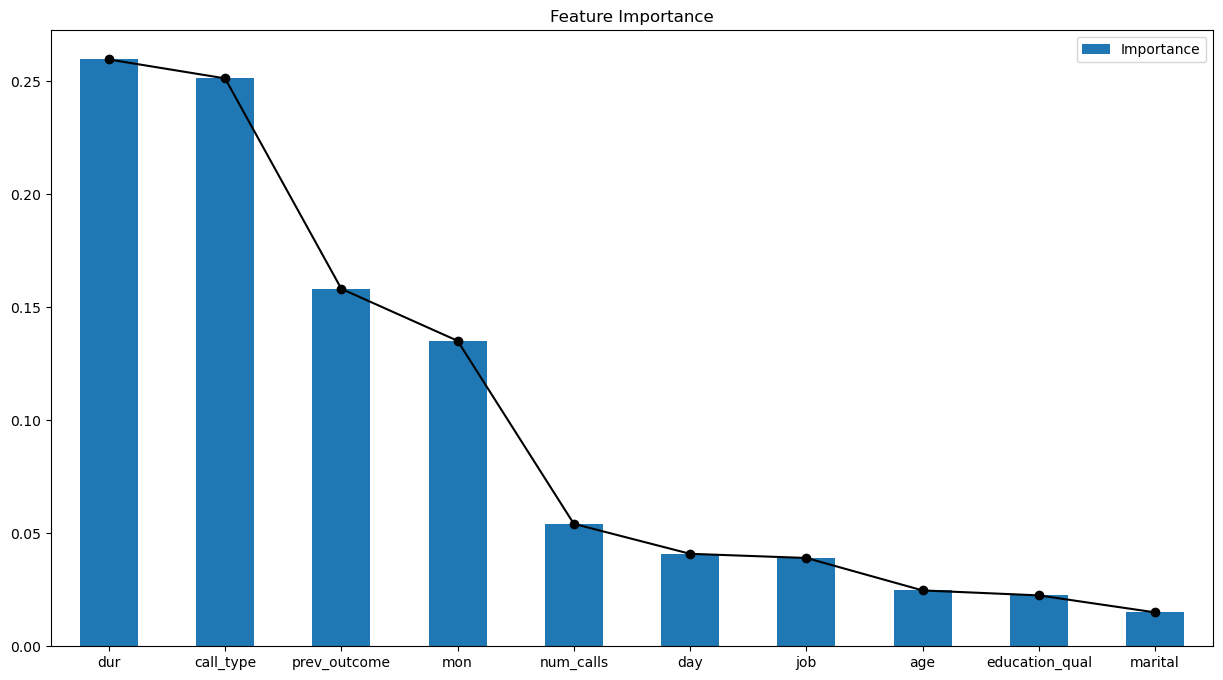

In [275]:
fig = plt.figure(figsize=(15, 8))

imp.plot(kind='bar', title='Feature Importance')

# Create the line plot
plt.plot(imp.keys(), imp.values,color='black',marker='o')
plt.xticks(rotation=0) 

# Add legend
plt.legend()
# Display the plot
plt.show()